In [45]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
words = [x for x in os.listdir("../data/treatedDF")]
max_frames = 30
word_keypoints = []  # Keypoint sequence for each sample
word_nums = []  # Words represented by numbers
for num, word in enumerate(words):
    df = pd.read_hdf(f"../data/treatedDF/{word}")
    for num_sample in df.n_sample.unique():
        word_keypoints.append([data["keypoints"] for _, data in df[df.n_sample == num_sample].iterrows()])
        word_nums.append(num)

In [3]:
# word_keypoints len is the total number of samples
word_keypoints = pad_sequences(word_keypoints, maxlen=30, padding="post", truncating="post", dtype='float32')
# word_keypoints shape = (355,60) = (total_n_samples,max_frames)

X_train, X_test, y_train, y_test = train_test_split(word_keypoints, word_nums, test_size=0.30)
X_train = np.array(X_train)
y_train = to_categorical(y_train, num_classes=4, dtype="int")
X_test = np.array(X_test)
y_test = to_categorical(y_test, num_classes=4, dtype="int")

In [8]:
early_stoping = callbacks.EarlyStopping(min_delta=0.001,
                                        patience=5,
                                        restore_best_weights=True,
                                        monitor="loss")
model = keras.Sequential(
    [layers.LSTM(64, return_sequences=True, activation="tanh", input_shape=(30, 126)),
     layers.LSTM(128, return_sequences=True, activation="tanh"),
     layers.LSTM(128, return_sequences=False, activation="tanh"),
     layers.BatchNormalization(),
     layers.Dense(70, activation="sigmoid"),
     layers.Dropout(0.2),
     layers.Dense(70, activation="relu"),
     layers.Dense(70, activation="relu"),
     layers.Dropout(0.2),
     layers.Dense(70, activation="relu"),
     layers.Dense(70, activation="relu"),
     layers.Dropout(0.2),
     layers.Dense(64, activation="relu"),
     layers.Dense(64, activation="relu"),
     layers.BatchNormalization(),
     layers.Dropout(0.2),
     layers.Dense(32, activation="sigmoid"),
     layers.Dense(32, activation="relu"),
     layers.Dense(4, activation="softmax")]
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Epoch 1/100
18/18 [==============================] - 7s 57ms/step - loss: 1.1766 - accuracy: 0.5347 - val_loss: 1.3631 - val_accuracy: 0.2632
Epoch 2/100
18/18 [==============================] - 0s 17ms/step - loss: 0.7415 - accuracy: 0.7934 - val_loss: 1.2470 - val_accuracy: 0.2632
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 0.5086 - accuracy: 0.8854 - val_loss: 1.0093 - val_accuracy: 0.6802
Epoch 4/100
18/18 [==============================] - 0s 17ms/step - loss: 0.3148 - accuracy: 0.9757 - val_loss: 0.6729 - val_accuracy: 0.9879
Epoch 5/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2316 - accuracy: 0.9757 - val_loss: 0.4055 - val_accuracy: 0.9919
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss: 0.2494 - accuracy: 0.9340 - val_loss: 0.4547 - val_accuracy: 0.8259
Epoch 7/100
18/18 [==============================] - 0s 16ms/step - loss: 0.1503 - accuracy: 0.9705 - val_loss: 0.2104 - val_accuracy: 0.9879
Epoch 

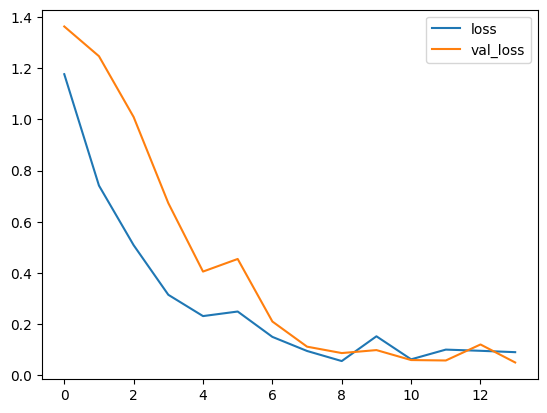

In [9]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stoping])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()

In [11]:
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 6ms/step


In [23]:
to_categorical(y_pred[0])

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [30]:
pred_values = [np.argmax(x) for x in y_pred]
pred_values

In [32]:
test_values = [np.argmax(x) for x in y_test]
test_values

[3,
 0,
 3,
 0,
 2,
 2,
 1,
 0,
 1,
 3,
 1,
 3,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 3,
 0,
 3,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 0,
 2,
 0,
 3,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 3,
 3,
 3,
 0,
 2,
 2,
 0,
 3,
 3,
 0,
 3,
 1,
 0,
 3,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 0,
 3,
 2,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 1,
 2,
 0,
 2,
 1,
 1,
 3,
 3,
 0,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 0,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 3,
 0,
 0,
 2,
 2,
 2,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 3,
 0,
 2,
 1,
 2,
 0,
 0]

In [46]:
mcm = confusion_matrix(test_values, pred_values,labels=[0,1,2,3])

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=mcm)

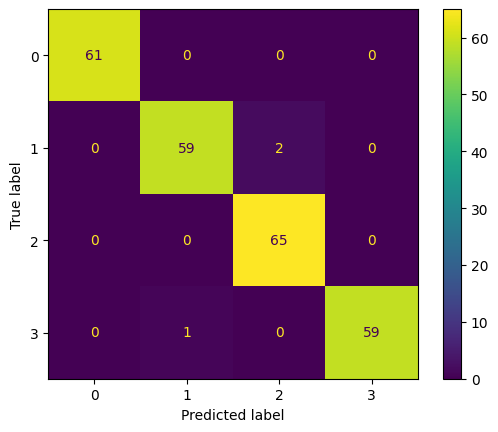

In [48]:
disp.plot()
plt.show()

In [49]:
if not os.path.exists("../data/model/"):
    os.mkdir("../data/model/")
print(model.summary())
model.save("../data/model/GestoLingo_NoteBook.keras")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 70)                9030      
                                                                 
 dropout_4 (Dropout)         (None, 70)                0         
                                                      